# Experiments

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Summary Statistics](#Summary-Statistics)
4. [Raw Data](#Raw-Data)
5. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import util
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Data
We first parse our dataset.

In [2]:
X, y, ids = util.parse_data()
n = X.shape[0]
classes = np.unique(y)

## Summary Statistics
### Softmax
For our baseline, we use a softmax classifier with summary statistic features. From plotting, it seems that minimum and standard deviation may be useful.

In [3]:
X_b = np.concatenate((np.amin(X, axis=1).reshape(n, 1), np.std(X, axis=1).reshape(n, 1)), axis=1)

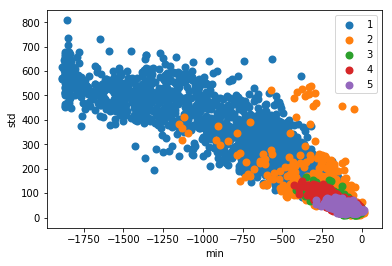

In [4]:
plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('min')
plt.ylabel('std')
plt.legend()
plt.show()

In [5]:
b_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000)
b_scores, b_cm = util.evaluate_model(X_b, y, ids, classes, b_clf, param_grid={})

In [6]:
b_scores

{'accuracy': 0.42634782608695654,
 'f1_macro': 0.3972504228197936,
 'f1_class_1': 0.8703396992862562,
 'f1_class_2': 0.2074925626653604,
 'f1_class_3': 0.09845672954264542,
 'f1_class_4': 0.3844553720042689,
 'f1_class_5': 0.4255077506004373}

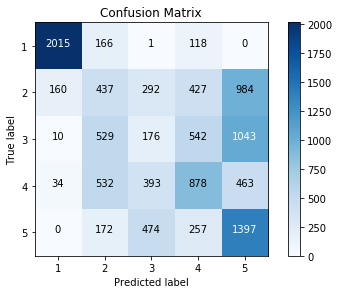

In [7]:
util.visualize_confusion_matrix(b_cm, classes)

### KNN

In [20]:
bk_clf = KNeighborsClassifier()
bk_scores, bk_cm = util.evaluate_model(X_b, y, ids, classes, bk_clf, param_grid={'n_neighbors': range(1, 10)})

In [21]:
bk_scores

{'accuracy': 0.4519130434782609,
 'f1_macro': 0.42728290250700474,
 'f1_class_1': 0.8574484047407094,
 'f1_class_2': 0.27984969643554586,
 'f1_class_3': 0.24392725152928102,
 'f1_class_4': 0.3554529607940755,
 'f1_class_5': 0.39973619903541185}

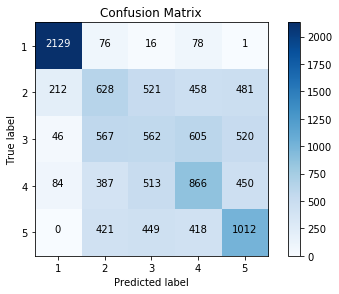

In [22]:
util.visualize_confusion_matrix(bk_cm, classes)

## Raw Data
### Softmax

In [8]:
r_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=2000)
r_scores, r_cm = util.evaluate_model(X, y, ids, classes, r_clf, param_grid={})

In [9]:
r_scores

{'accuracy': 0.1973913043478261,
 'f1_macro': 0.1923606559831909,
 'f1_class_1': 0.29171467074354923,
 'f1_class_2': 0.15219380860144247,
 'f1_class_3': 0.1261003417972107,
 'f1_class_4': 0.2162434565170394,
 'f1_class_5': 0.17555100225671294}

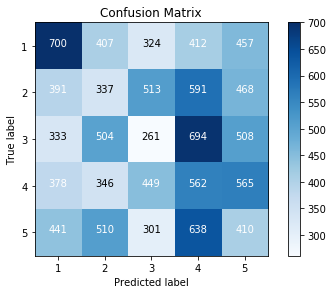

In [10]:
util.visualize_confusion_matrix(r_cm, classes)

### KNN

In [23]:
rk_clf = KNeighborsClassifier()
rk_scores, rk_cm = util.evaluate_model(X, y, ids, classes, rk_clf, param_grid={'n_neighbors': range(1, 10)})

In [24]:
rk_scores

{'accuracy': 0.5350434782608695,
 'f1_macro': 0.5166243265296454,
 'f1_class_1': 0.8453857630738216,
 'f1_class_2': 0.5083917938375555,
 'f1_class_3': 0.4833353200542419,
 'f1_class_4': 0.5165949519920724,
 'f1_class_5': 0.229413803690536}

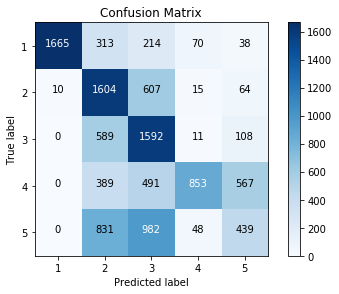

In [25]:
util.visualize_confusion_matrix(rk_cm, classes)

## Fourier Transform
### Softmax

In [11]:
X_f = np.fft.fft(X).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [13]:
f_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=3000)
f_scores, f_cm = util.evaluate_model(X_f, y, ids, classes, f_clf, param_grid={})

In [14]:
f_scores

{'accuracy': 0.20243478260869568,
 'f1_macro': 0.19234099606850938,
 'f1_class_1': 0.2950451353751581,
 'f1_class_2': 0.14837522526887625,
 'f1_class_3': 0.10012941472869,
 'f1_class_4': 0.23136257634330976,
 'f1_class_5': 0.18679262862651283}

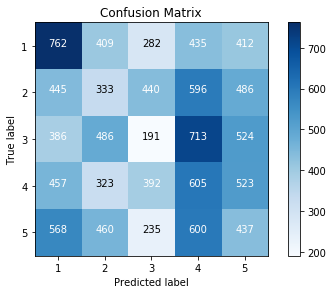

In [15]:
util.visualize_confusion_matrix(f_cm, classes)

### KNN

In [26]:
fk_clf = KNeighborsClassifier()
fk_scores, fk_cm = util.evaluate_model(X_f, y, ids, classes, fk_clf, param_grid={'n_neighbors': range(1, 10)})

In [27]:
fk_scores

{'accuracy': 0.5049565217391304,
 'f1_macro': 0.49581673342045207,
 'f1_class_1': 0.8189345077777446,
 'f1_class_2': 0.46187253091334474,
 'f1_class_3': 0.44074994754734204,
 'f1_class_4': 0.49645469337463644,
 'f1_class_5': 0.2610719874891926}

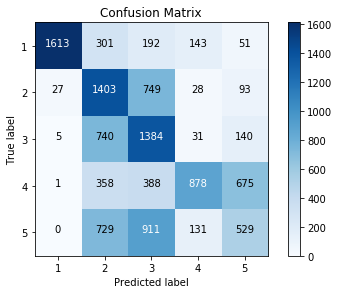

In [28]:
util.visualize_confusion_matrix(fk_cm, classes)